<a href="https://colab.research.google.com/github/Naveen1023/Text-Based-Sentiment-Analysis-Based-On-Natural-Language-Processing/blob/main/Text_Based_Sentiment_Analysis_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install jovian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 4.9 MB/s 
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6503 sha256=a517b7a3723a86add2d0b5437f439137a8745c58c41c0c8d2001f7abfe9e5aff
  Stored in directory: /root/.cache/pip/wheels/2a/ea/87/dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid


In [ ]:

import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
import pandas as pd
path = "/content/gdrive/MyDrive/Colab Notebooks/Text Based Sentiment Analysis/DataSet/Twitter_Data.csv"
df1 = pd.read_csv(path)
df1.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/Text Based Sentiment Analysis/DataSet/apple-twitter-sentiment-texts.csv"
df2 = pd.read_csv(path)
df2 = df2.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df2['category'] = df2['category'].map({-1: -1.0, 0: 0.0, 1:1.0})
df2.head()

,clean_text,category
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1.0
1,What Happened To Apple Inc? http://t.co/FJEX...,0.0
2,Thank u @apple I can now compile all of the pi...,1.0
3,The oddly uplifting story of the Apple co-foun...,0.0
4,@apple can i exchange my iphone for a differen...,0.0


In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/Text Based Sentiment Analysis/DataSet/finalSentimentdata2.csv"
df3 = pd.read_csv(path)
df3 = df3.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df3['category'] = df3['category'].map({'sad': -1.0, 'anger': -1.0, 'fear': -1.0, 'joy':1.0})
df3 = df3.drop(['Unnamed: 0'], axis=1)
df3.head()

,category,clean_text
0,-1.0,agree the poor in india are treated badly thei...
1,1.0,if only i could have spent the with this cutie...
2,1.0,will nature conservation remain a priority in ...
3,-1.0,coronavirus disappearing in italy show this to...
4,-1.0,uk records lowest daily virus death toll since...


In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/Text Based Sentiment Analysis/DataSet/Tweets.csv"
df4 = pd.read_csv(path)
df4 = df4.rename(columns={'text': 'clean_text', 'airline_sentiment':'category'})
df4 = df4[['category','clean_text']]
df4['category'] = df4['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive':1.0})
df4.head()

,category,clean_text
0,0.0,@VirginAmerica What @dhepburn said.
1,1.0,@VirginAmerica plus you've added commercials t...
2,0.0,@VirginAmerica I didn't today... Must mean I n...
3,-1.0,@VirginAmerica it's really aggressive to blast...
4,-1.0,@VirginAmerica and it's a really big bad thing...


In [ ]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
print(df.isnull().sum())
df.dropna(axis=0, inplace=True)

# NULL VALUES

clean_text    4
category      7
dtype: int64


In [ ]:
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


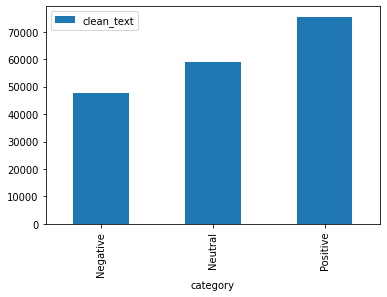

In [ ]:
df.groupby('category').count().plot(kind='bar')

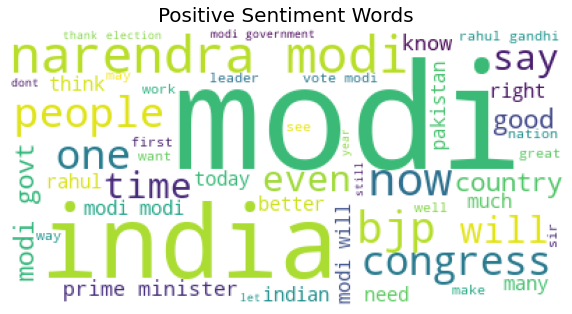

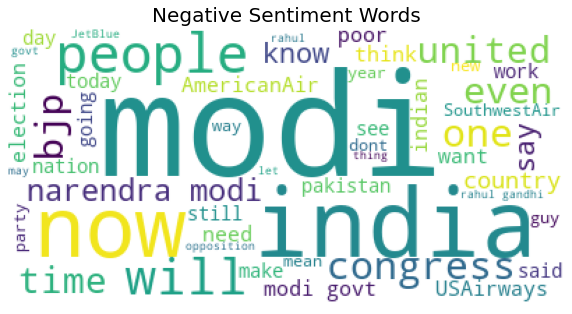

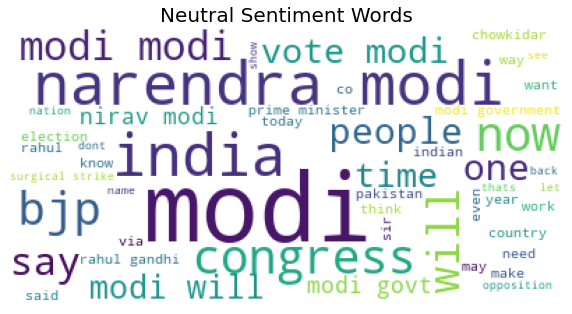

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['clean_text']])
                          
   
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    #  plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(df, 'Positive')
     
# Negative tweet words
wordcount_gen(df, 'Negative')
     
# Neutral tweet words
wordcount_gen(df, 'Neutral')

In [ ]:
import plotly.express as px
fig = px.pie(df, names = 'category', title ='Pie chart of different sentiments of tweets')
fig.show()

In [ ]:
import re 
import nltk  
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''

    text = tweet.lower()
    
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)

    words = text.split()
    #removing stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    words = [PorterStemmer().stem(w) for w in words]
    return words
 
print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


In [ ]:
X = list(map(tweet_to_words, df['clean_text']))

In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(df['category'])

print(X[0])
print(Y[0])



['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']
0


In [ ]:
from sklearn.model_selection import train_test_split

y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vocabulary_size = 5000

# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [ ]:
print(count_vector.get_feature_names()[0:200])

['0', '000', '1', '10', '100', '1000', '10000', '10th', '11', '111', '1145', '11th', '12', '1200', '12000', '125', '12k', '130', '140', '14000', '15', '150', '1500', '1500000', '1520', '157200000', '15l', '15lac', '15lakh', '18', '180', '19', '1947', '1958', '1962', '1969', '1971', '1980', '1984', '1998', '1st', '2', '20', '200', '2000', '2002', '2004', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2022', '2024', '2029', '21st', '23', '23rd', '24', '247', '24x7', '25', '250', '2611', '26th', '272', '27th', '280319', '282', '28th', '2cr', '2day', '2nd', '3', '30', '300', '3000', '30000', '300km', '31st', '350', '35a', '370', '3rd', '4', '40', '400', '4000', '45', '456', '4th', '5', '50', '500', '5000', '50000', '5th', '5year', '5yr', '6', '60', '600', '6000', '6th', '7', '72000', '7200000', '72k', '7th', '8', '80', '800', '8020', '9', '90', '9000', 'aa', 'aadhaar', 'aadhar', 'aadmi', 'aag', 'aaj', 'aalo', 'aam', 'aan', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
After Tokenization & Padding 
 [  41    1  349   73 1911 1180   44 2465    2 1259  219    2  236   32
  165  102   53   55 1184  236   50    3    6  533    3   50 3833    3
 3077    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (109397, 50) (109397, 3)
Validation Set -> (36466, 50) (36466, 3)
Test Set -> (36466, 50) (36466, 3)


In [ ]:
import keras.backend as K

def f1_score(precision, recall):
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))

model.add(Dense(3, activation='softmax'))

In [ ]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 179,939
Trainable params: 179,939
Non-trai

In [ ]:

loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9131
Precision : 0.9174
Recall    : 0.9081
F1 Score  : 0.9127


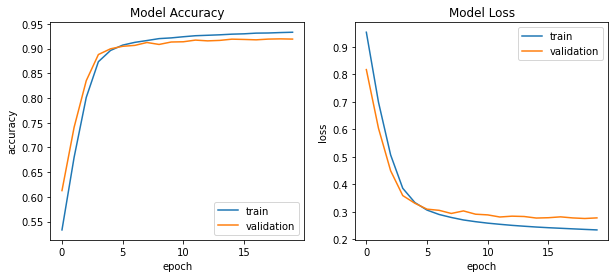

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

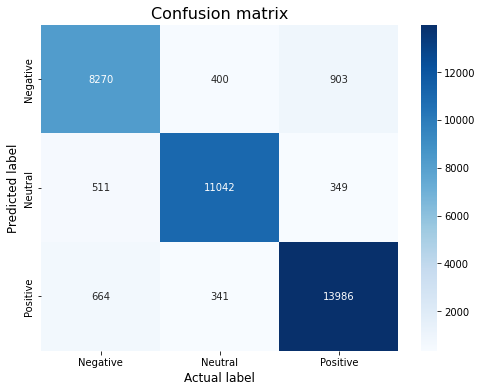

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)